In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Sneha Gupta/Downloads/Food_Delivery_Time_Prediction.csv")
df

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [3]:
df.isnull().sum()
# df['Time'] = df['Time'].mean()
median = df['Delivery_Time'].median()
df['Delayed'] = df['Delivery_Time'].apply(lambda x: 1 if x> median else 0)
df['Delayed']


0      0
1      0
2      0
3      1
4      0
      ..
195    0
196    1
197    1
198    0
199    1
Name: Delayed, Length: 200, dtype: int64

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x = df[['Distance','Delivery_Person_Experience']]      #GUASSIAN NEED 2D MATRIX
y = df['Delayed']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
   # random state help to not vary the output (the output vary due to change in test sample)
gn = GaussianNB()
a = gn.fit(x_train,y_train)
y_pred =a.predict(x_test)
print("Naive Bayes Score",gn.score(x_test,y_test))

Naive Bayes Score 0.5666666666666667


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)


naive bayes
Accuracy: 0.5666666666666667
Precision: 0.6
Recall: 0.5625
F1 Score: 0.5806451612903226


<Axes: >

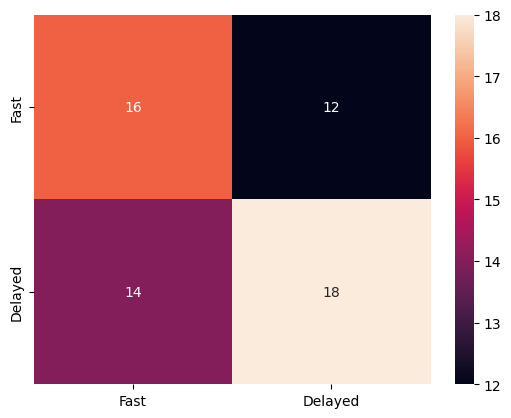

In [6]:
print('naive bayes')
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
import seaborn as s
s.heatmap(cf,annot = True,xticklabels=['Fast', 'Delayed'], yticklabels=['Fast', 'Delayed'])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
acc1 = accuracy_score(y_test,y_pred)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
cf1 = confusion_matrix(y_test, y_pred1)

In [8]:
print('KNN')
print('accuary score', acc1)
print('precision score', prec1)
print('f1 score',f1_1)
print('confusion matrix',cf1)

KNN
accuary score 0.5666666666666667
precision score 0.52
f1 score 0.45614035087719296
confusion matrix [[16 12]
 [19 13]]


In [11]:
from sklearn.tree import DecisionTreeClassifier
x_train2,x_validation,y_train2,y_validation = train_test_split(x_train,y_train, test_size = 0.3,random_state = 60)
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
dtree1 = dtree.fit(x_train2,y_train2)
pred = dtree1.predict(x_validation)
pred2 = dtree1.predict(x_test)
acc2 = accuracy_score(y_validation,pred)
acc3 = accuracy_score(y_validation,pred)
prec2 = precision_score(y_validation,pred)
rec2 = recall_score(y_validation,pred)
f1_2 = f1_score(y_validation,pred)
cf2 = confusion_matrix(y_validation,pred)


0.47619047619047616

In [13]:
print('Decision tree using criterior entropy')
print('accuary score', acc2)
print('precision score', prec2)
print('f1 score',f1_2)
print('confusion matrix',cf2)

Decision tree using criterior entropy
accuary score 0.47619047619047616
precision score 0.44
f1 score 0.5
confusion matrix [[ 9 14]
 [ 8 11]]


In [28]:
dtree_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dtree2 = dtree.fit(x_train2, y_train2)
pred_1 = dtree2.predict(x_validation)
pred2 = dtree2.predict(x_test)
# acc_1 = accuracy_score(y_test,pred)
acc_1 = accuracy_score(y_validation,pred)
prec_1 = precision_score(y_validation,pred)
rec_1 = recall_score(y_validation,pred)
f1_3 = f1_score(y_validation,pred)
cf_1 = confusion_matrix(y_validation,pred)
print(acc_1,
      pred_1,
      rec_1,
      f1_3 ,
      cf_1)

0.47619047619047616 [1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1
 1 1 0 1 1] 0.5789473684210527 0.5 [[ 9 14]
 [ 8 11]]


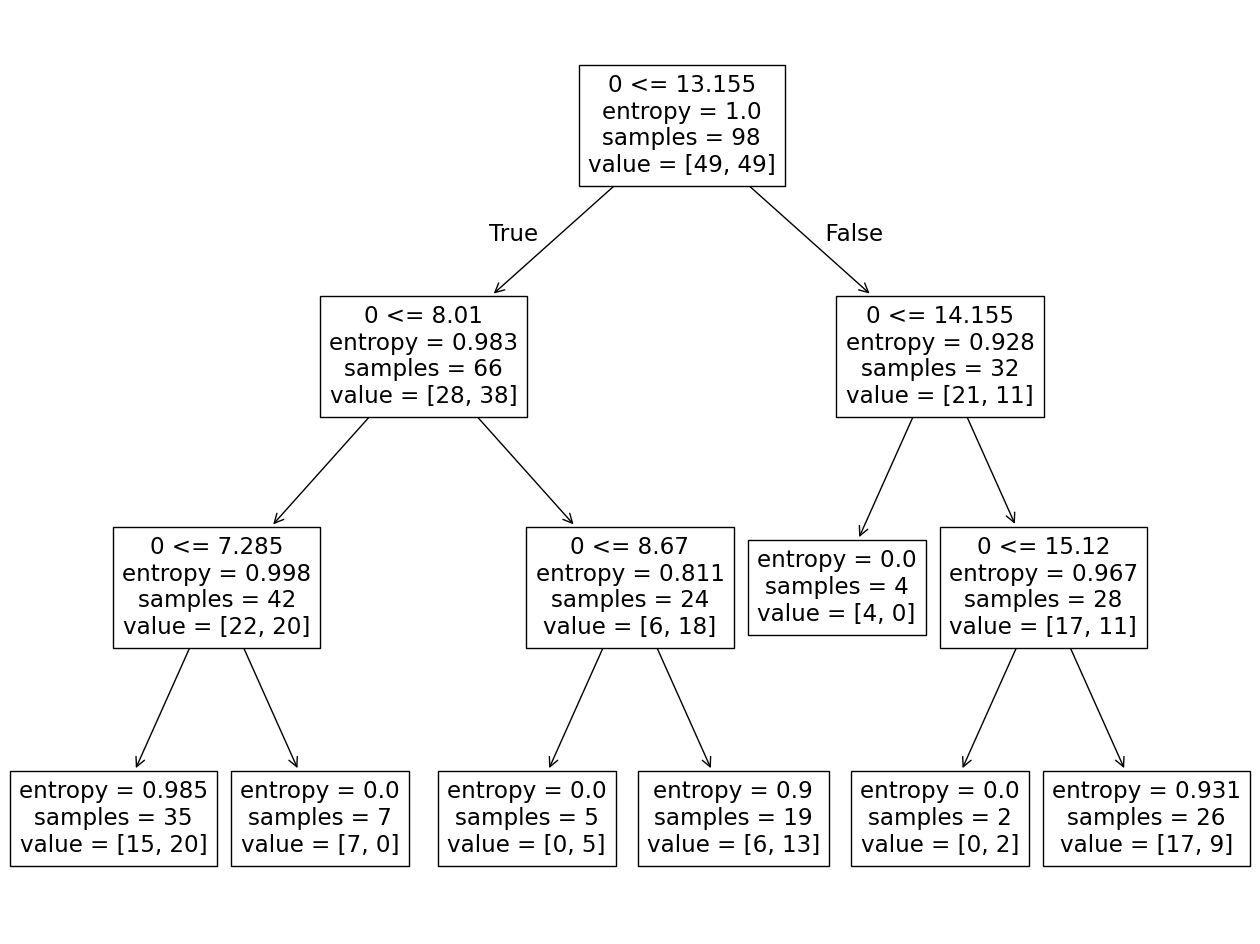

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (16,12))
a= plot_tree(dtree, feature_names = df['Delayed'])


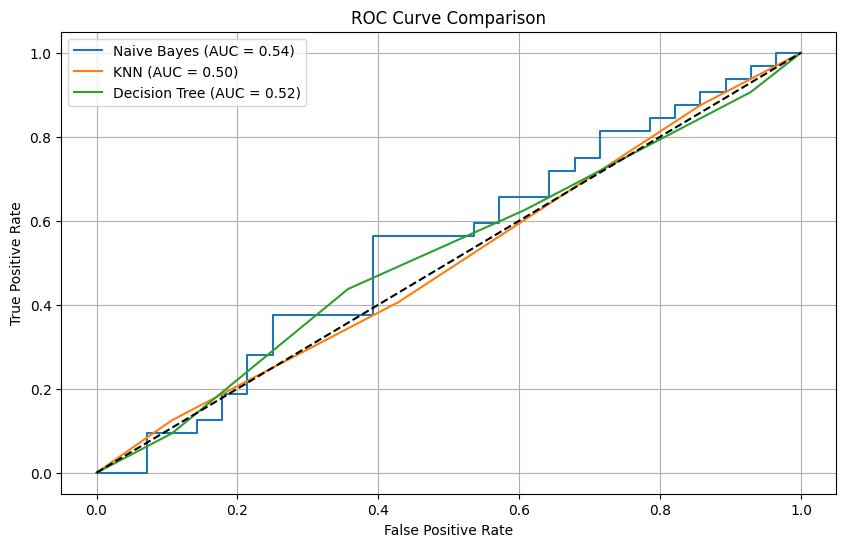

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Naive Bayes
y_prob_nb = gn.predict_proba(x_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

# KNN
y_prob_knn = model.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

# Decision Tree
y_prob_dt = dtree1.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()
